# HR Analytics - Employee Attrition and Workforce Insights
### Author

**Stavan Ravisaheb**

**Date:** October 2025

**Dataset Source:** HR Analytics (Kaggle)

### Objective

To analyze employee-related data to identify the key factors influencing attrition and provide insights that can help HR improve employee retention and satisfaction.

### Dataset

The dataset, sourced from Kaggle, includes 1,470 employee records with attributes such as demographics, job roles, income, satisfaction levels, and attrition status.


### Data Cleaning and Preprocessing
The raw data often contains errors, missing values, or inconsistent formats. I will clean the data by:
-   Removing rows with missing elements, as they cannot be used for employee analysis.
-   Removing rows with duplicate values.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sb
import openpyxl as xl
# Load the required file. 
df=pd.read_csv('HR-Employee-Attrition.csv')

In [25]:
# Dataset statistics
df.head()
df.tail()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [26]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [27]:
# List of Columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [28]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
# Remove redundant columns
df.drop(['Over18', 'MonthlyRate', 'HourlyRate', 'DailyRate', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True, errors='ignore') 

In [30]:
# Remove duplicate values
df.drop_duplicates(inplace=True)

In [31]:
# Remove missing values
df.dropna(inplace=True)

In [32]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Feature Engineering

Two new derived columns to enhance the dataset:

1. **TenureGroup**

   Categorizes the column *'YearsAtCompany'* for attrition trend analysis.

2. **IncomeGroup**

   Splits the column *'MonthlyIncome'* into quartiles for salary-based attrition analysis and income levels.


In [33]:
df['TenureGroup']=np.where(df['YearsAtCompany']<=2, 'New', np.where(df['YearsAtCompany']<=5, 'Mid', 'Senior'))

In [34]:
df[['YearsAtCompany', 'TenureGroup']].head(5)

,YearsAtCompany,TenureGroup
0,6,Senior
1,10,Senior
2,0,New
3,8,Senior
4,2,New


In [35]:
df['IncomeGroup'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

### Data Consistency Check
- Verified column names and data types — all consistent and properly formatted.
- Categorical variables (e.g., Gender, Department, OverTime) have uniform capitalization.
- No missing or null values detected.
- Numeric columns (e.g., Age, MonthlyIncome, YearsAtCompany) fall within expected ranges.

Hence, no major data inconsistencies were found.


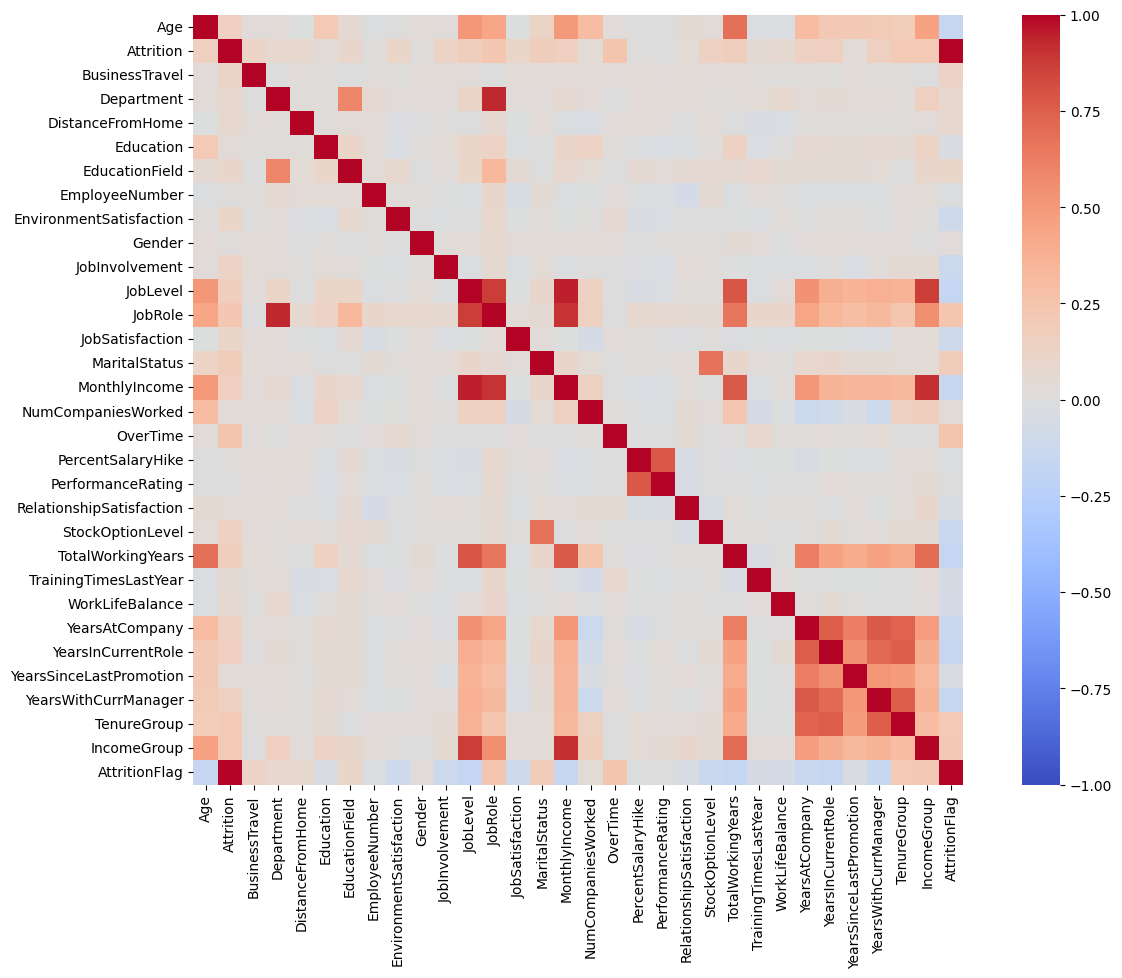

{'corr':                                Age  Attrition  BusinessTravel  Department  \
 Age                       1.000000   0.159205        0.029165    0.032288   
 Attrition                 0.159205   1.000000        0.122880    0.077375   
 BusinessTravel            0.029165   0.122880        1.000000    0.000000   
 Department                0.032288   0.077375        0.000000    1.000000   
 DistanceFromHome         -0.001686   0.077924        0.025275    0.017897   
 Education                 0.208034   0.031373        0.008895    0.019641   
 EducationField            0.061747   0.086617        0.000000    0.587962   
 EmployeeNumber           -0.010145   0.010577        0.022706    0.068013   
 EnvironmentSatisfaction   0.010146   0.103369        0.012717    0.027982   
 Gender                    0.036311   0.008897        0.037174    0.025605   
 JobInvolvement            0.029820   0.130016        0.045881    0.026132   
 JobLevel                  0.509604   0.169105        0.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
df['AttritionFlag']=df['Attrition'].apply(lambda x: 1 if x=="Yes" else 0 )
associations(df, figsize=(15,10), cmap='coolwarm', compute_only=False, annot=False)

In [37]:
# Sorted values of correlation of all columns with Attrition value. 
assoc=associations(df, plot=False)
corr_matrix=assoc['corr']
attrition_corr=corr_matrix['Attrition'].sort_values(ascending=False)
print(attrition_corr)

AttritionFlag               1.000000
Attrition                   1.000000
OverTime                    0.242749
JobRole                     0.230701
IncomeGroup                 0.206242
TenureGroup                 0.204900
MaritalStatus               0.173386
TotalWorkingYears           0.171063
JobLevel                    0.169105
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
BusinessTravel              0.122880
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
EducationField              0.086617
DistanceFromHome            0.077924
Department                  0.077375
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
E

In [38]:
#Load the prepared file
df.to_csv('HR-Employee-Attrition-Cleaned.csv', index=False)

### Data Export

The cleaned dataset was successfully saved as 'HR-Employee_Attrition-Cleaned.csv' and is available in the working directory for further visualization and analysis in Power BI.


### Predictive Modeling: Employee Attrition

In this section, we build a ML model to predict employee attrition using the given HR dataset.

**Objective**

- To predict whether an employee is likely to leave the company based on features like age, monthly income, etc.

- Identify the most important factors contributing to attrition.


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
df_model = pd.read_csv('HR-Employee-Attrition-Cleaned.csv')
df_model['Attrition'] = df_model['Attrition'].apply(lambda x: 1 if x=="Yes" else 0)
df_model_encoded = pd.get_dummies(df_model, drop_first=True)
X = df_model_encoded.drop(['Attrition'], axis=1)
Y = df_model_encoded['Attrition']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))





Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [40]:
# Sorted list of importance of features in attrition prediction
importance=pd.Series(model.coef_[0], index=X.columns)
importance_sorted=importance.sort_values(ascending=False)
print(importance_sorted)

AttritionFlag                        3.966782
OverTime_Yes                         0.317046
MaritalStatus_Single                 0.176687
BusinessTravel_Travel_Frequently     0.131272
NumCompaniesWorked                   0.128164
JobRole_Laboratory Technician        0.127424
IncomeGroup_Low                      0.124310
YearsAtCompany                       0.119436
TenureGroup_New                      0.112525
YearsSinceLastPromotion              0.104549
DistanceFromHome                     0.097358
EducationField_Technical Degree      0.086876
JobRole_Sales Representative         0.081843
Department_Sales                     0.055239
Gender_Male                          0.046122
BusinessTravel_Travel_Rarely         0.044885
JobRole_Human Resources              0.040561
JobRole_Sales Executive              0.040422
IncomeGroup_Very High                0.037972
MaritalStatus_Married                0.037475
TenureGroup_Senior                   0.025942
Education                         

### Model Insights and Key Features

- The logistic regression model achieved high accuracy on the test set (Accuracy=1.0).

- The features most impacting employee attrition are:

  AttritionFlag - Same as 'Attrition' column.

  OverTime_Yes – Employees working overtime are more likely to leave.

  MaritalStatus_Single – Single employees show higher attrition tendency.

  BusinessTravel_Travel_Frequently - Frequent travellers show higher attrition tendency.

  NumCompaniesWorked – Frequent job changes increase attrition risk.

  IncomeGroup_Low – Lower income employees are more likely to leave.

- Other moderately influential features include YearsAtCompany, TenureGroup_New, YearsSinceLastPromotion, etc.